
# **Kaggle ML & DS Survey Challenge**



In [ ]:
'''!pip install numpy
!pip install pandas 
!pip install sklearn 
!pip install scipy
!pip install matplotlib
!pip install seaborn'''

'!pip install numpy\n!pip install pandas \n!pip install sklearn \n!pip install scipy\n!pip install matplotlib\n!pip install seaborn'

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import levene

import statsmodels.api as sm
import statsmodels.formula.api as sfa

!pip install pingouin
from pingouin import welch_anova

import random

#### Load data Kaggle ML & DS Survey dataset in dataframe for processing and exploratory analysis 

In [ ]:
# load 'clean_kaggle_data.csv' to Google Colab or 'clean_kaggle_data.csv' file in the session before running#
try:
  from google.colab import files
  uploaded = files.upload()
except:
  pass

Saving clean_kaggle_data.csv to clean_kaggle_data.csv


In [ ]:
#load 'clean_kaggle_data.csv' file in the session before running#
df = pd.read_csv ('clean_kaggle_data.csv', index_col = False)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (285) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,...,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,Qlik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,Google Cloud AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,C++,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,Other,Kaggle Notebooks,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DataRobot AutoML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,NaN,Jupyter Notebook,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,MATLAB,NaN,NaN,Python,NaN,NaN,NaN,NaN,NaN,Spyder,NaN,NaN,NaN,MATLAB,Jupyter Notebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.shape, 
      '\n Gender catergories of participants')
display(df['Q2'].value_counts())
print('\nRemoving participants other than Man and Woman categories would lead to ',
      (df.shape[0]-(df['Q2'].value_counts().values[0] + df['Q2'].value_counts().values[1]))/df.shape[0]*100, 
      '% loss of data which would not effect our analysis')

(15391, 370) 
 Gender catergories of participants


Man                        12642
Woman                       2482
Prefer not to say            196
Nonbinary                     47
Prefer to self-describe       24
Name: Q2, dtype: int64


Removing participants other than Man and Woman categories would lead to  1.7347800662724968 % loss of data which would not effect our analysis


In [ ]:
## Dropping first unnamed column
df1 = df.drop(['Unnamed: 0'], axis=1)

## Selecting rows for Man and Woman entries and dropping other categories from Q2 ####
df2 = df1.loc[df1['Q2'].isin(['Man', 'Woman'])]
df2['Q2'].value_counts()

Man      12642
Woman     2482
Name: Q2, dtype: int64

**To observe the trend in salary, a barplot is plotted with the average salary compensation accross the countries. Countries are sorted in descending order based on the annual salary in data science field.**

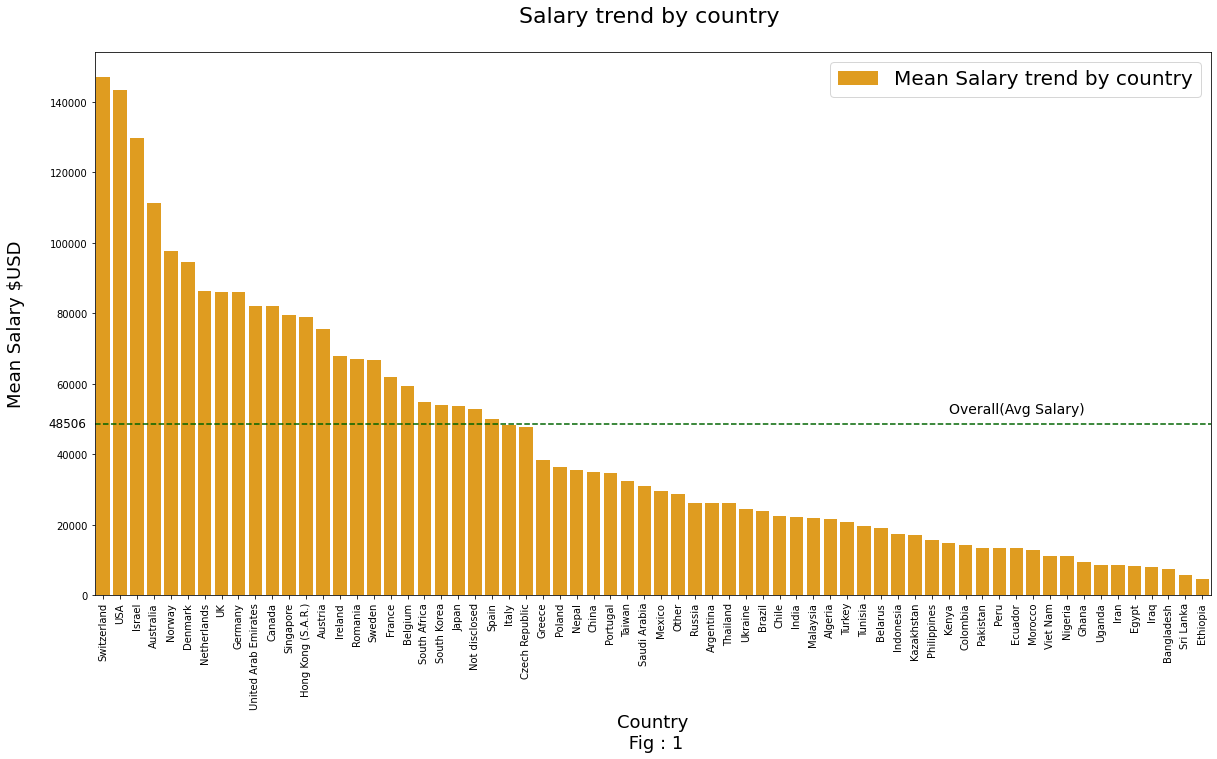

In [ ]:
### Plot 1.1  Salary trend by country ----------------###

### New dataframe with grouped countries
salary_by_country = df2.groupby("Q3").agg({"Q25":['count','mean']})

# Average salary accross all countries 
avg_sal_country = df2['Q25'].mean()


# Rename countries for better visualization 
salary_by_country= salary_by_country.rename( index={"United States of America": "USA", 
                                 "I do not wish to disclose my location": "Not disclosed",
                                 "United Kingdom of Great Britain and Northern Ireland":"UK",
                                 "Iran, Islamic Republic of...": 'Iran'}
                                 )

##### Add no of countries above average salary ######

#Plot
fig,ax1 = plt.subplots(1,1, figsize=(20, 10))
#plt.plot(salary_by_country[('Q25', 'mean')].sort_values(ascending = False)[:20],"o-g",label="Mean Salary trend by country")

sns.barplot(x=salary_by_country[('Q25', 'mean')].sort_values(ascending = False).index,
            y=salary_by_country[('Q25', 'mean')].sort_values(ascending = False).values,
            color="orange",label="Mean Salary trend by country"
            )
ax1.annotate(round(avg_sal_country),xy = (0,avg_sal_country+15),
             xytext=(-1,avg_sal_country+15),ha="right",va="center",
             fontsize =12, fontfamily = "sans-serif" 
             )

plt.axhline(y=avg_sal_country, color='darkgreen', linestyle='--')
plt.text(50,avg_sal_country+3000,'Overall(Avg Salary)', 
         fontsize=14, weight="light")

### Trial ------------- ####
#for idx,val in enumerate(salary_by_country[('Q25', 'count')].sort_values(ascending = False)[:25].values):
#  ax1.annotate(val,xy = (idx,val+15),ha="center",va="center",fontsize =18, fontfamily = "sans-serif" )

#plt.plot(salary_by_country[('Q25', 'max')].sort_values(ascending = False),"-b",label="Max Salary trend by country")
#plt.plot(salary_by_country[('Q25', 'max')],"-r",label="Mean Salary trend by country")
#plt.title('#{}'.format(country_list_fn[i]))
### Trial ------------- ####


# Legend 
plt.legend(loc = 'best',prop={'size': 20})
plt.xlabel('Country\n Fig : 1',horizontalalignment="center",fontstyle = "normal", fontsize = "18", fontfamily = "sans-serif")
plt.ylabel('Mean Salary $USD\n',horizontalalignment="center",fontstyle = "normal", fontsize = "18", fontfamily = "sans-serif")
plt.title('Salary trend by country \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=90)
plt.show()

**Plotting the mean salary trend accross all the countries in the survey**
•	Plot shows the sorted list of countries on the x axis according to the average salary compensation in data science field.

  >	Switzerland, USA, and Israel being the top three countries. 

  >	Ethiopia, Sri Lanka, and Bangladesh being the bottom three. 

  >	25 countries that have average salary greater than the overall mean (USD ~48500) among the 66 countries.  

•	These results can be biased based on the number of candidates participating in the survey. Also, there is a huge variation in salary compensation across the countries.


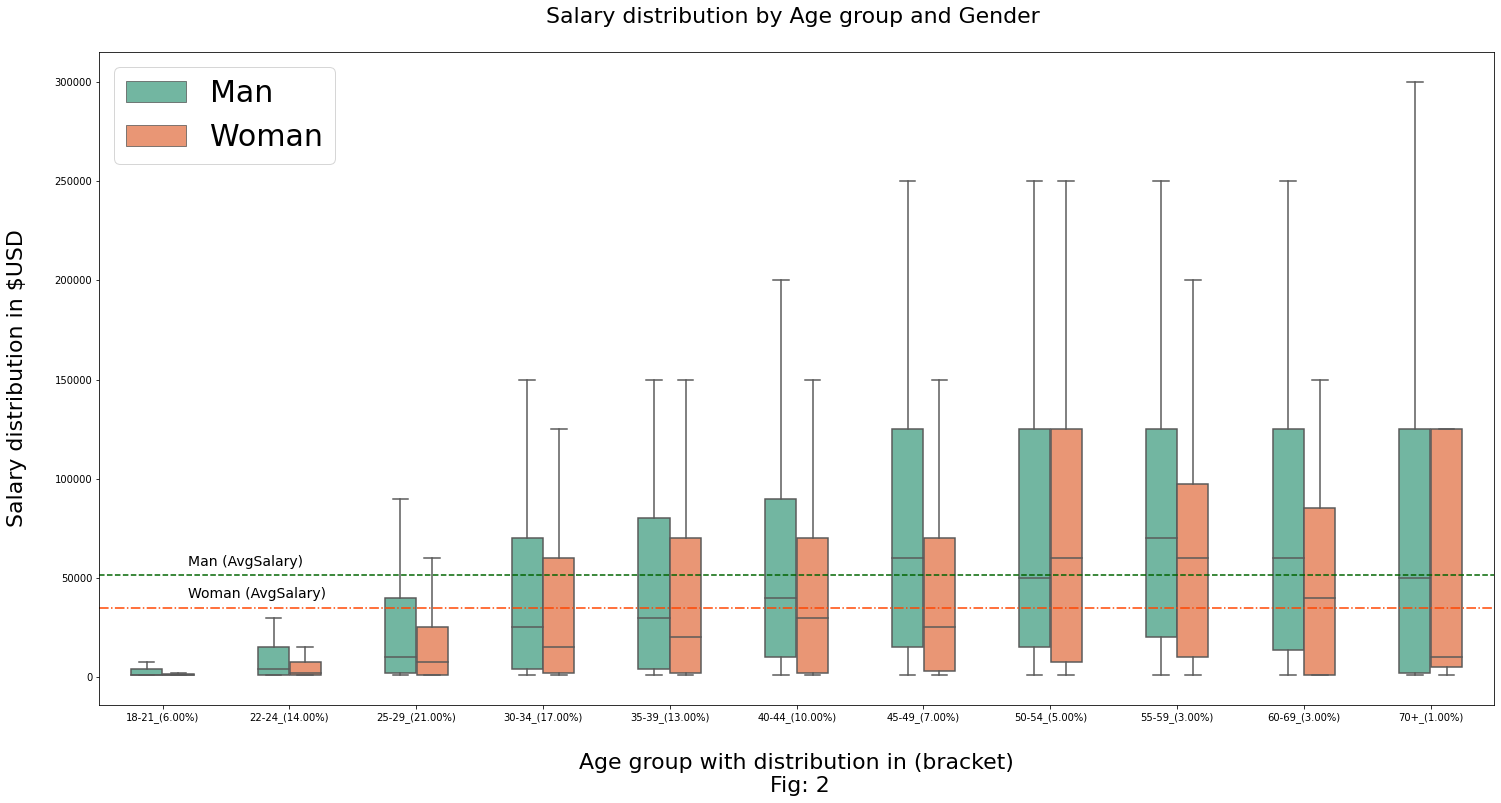

In [ ]:
## Plot 1.2  Salary distribution by Age group and Gender  ---------------------------------------------------------------------------------------------------------------#####
#Average salaries for man and woman in the dataset
Avg_sal_man = df2[(df2['Q2']=="Man")]['Q25'].mean()
Avg_sal_woman = df2[(df2['Q2']=="Woman")]['Q25'].mean()

#--------------------------------------------------------------------------------------#

#q1_sorted = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']    ### Order for age group
q1_sorted = sorted(df2['Q1'].unique())
group_dist = round(df2['Q1'].value_counts()[q1_sorted]/len(df2['Q1']), ndigits=2)

# Plot 1
fig,ax1 = plt.subplots(1,1, figsize=(25, 12))
ag_plot = sns.boxplot(x=df2['Q1'], y=df2['Q25'],hue=df2['Q2'] ,order=q1_sorted,data=df1, 
                      palette='Set2',showfliers=False, whis = 1.5, width=0.5)
plt.axhline(y=Avg_sal_man, color='darkgreen', linestyle='--')
plt.text(0.2,Avg_sal_man+5000,'Man (AvgSalary)', fontsize=14, weight="light")
plt.axhline(y=Avg_sal_woman, color='orangered', linestyle='-.')
plt.text(0.2,Avg_sal_woman+5000,'Woman (AvgSalary)', fontsize=14, weight="light")

#Labels
new_labels = [item.get_text() + "_({:.2%})".format(group_dist[(item.get_text())]) for item in ag_plot.get_xticklabels()];
ag_plot.set_xticklabels(new_labels, rotation=90, fontsize=20);
plt.legend(loc = 'best',prop={'size': 30})
plt.xlabel('Age group with distribution in (bracket)\n Fig: 2',horizontalalignment="center",fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif",labelpad=30)
plt.ylabel('Salary distribution in $USD\n',horizontalalignment="center",fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.title('Salary distribution by Age group and Gender \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=00,fontsize = "10")
plt.show()


**Plot above shows the age group and salary distribution in the dataset among the genders male and female.**

> It can be observed that the top contributer's in the survey are from age group 25 -29 (21%) , age group 30 - 34(17 %), age group 22 - 24(14 %).

> Across all the age groups median salary of woman is less than that of man.Also, the overall mean salary is less compared to male participants.

> Participants below age group of 25 years have salary less than the overall average for both the genders. This could be baised as there are very few entries from higher age group participants.

> Variation (spread) in the salary increseas with the age group. That can be linked with the higher education and experiance which needs to be verified further.

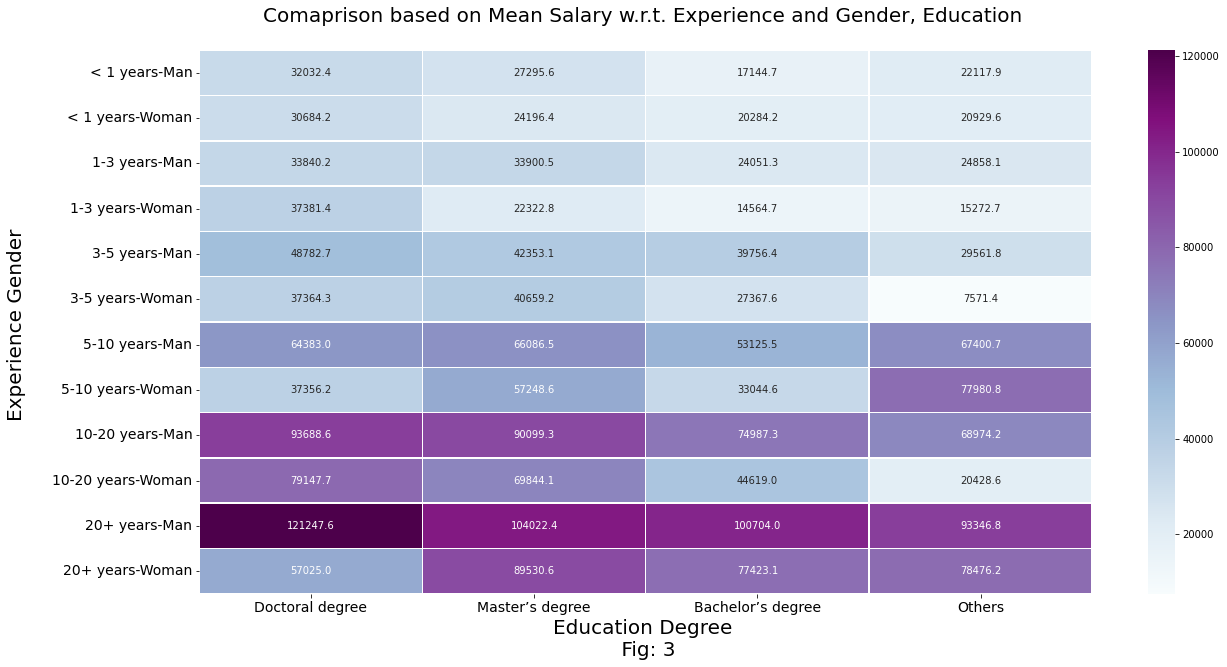

In [ ]:
### Plot 1.3  Salary trend by education, experience and gender ----------------###
#'Q4' : education;  'Q6' is Experience : 'Q2' gender

## Collating dataframe for with gender, education, experience and salary
sal_edu_exp = df2.loc[:,['Q2','Q4','Q6','Q25']]

degree_list = list(sal_edu_exp['Q4'].value_counts().index)   ### Getting list of degrees
degree_index = degree_list[0:3]                              ### Selecting top 3 from list of degrees

exp_list = list(sal_edu_exp['Q6'].value_counts().index)      ### Getting list of experience
exp_index = exp_list[0:6]                                    ### Ignore last category

sal_edu_exp.loc[~sal_edu_exp['Q4'].isin(degree_index),"Q4"] = "Others"   ## Put items other than top 3 degrees in "Others"
sal_edu_exp = sal_edu_exp.loc[sal_edu_exp['Q6'].isin(exp_index)].copy()  ## Updated dataframe after changes in degree and experience

## Set order of degree and experience for proper plot
degree_order = ['Doctoral degree','Master’s degree','Bachelor’s degree','Others']  ## "Q4"
exp_order = ['< 1 years','1-3 years','3-5 years','5-10 years','10-20 years','20+ years']  ## "Q6"

#Preparing a pivot table for heatmap. [index: Q2 and Q6], [columns: Q4]
sal_edu_exp_pivot = pd.pivot_table(sal_edu_exp, values='Q25', index=['Q6', 'Q2'],
                    columns=['Q4'], aggfunc=(np.mean))

sal_edu_exp_pivot= sal_edu_exp_pivot.reindex(columns=degree_order) # setting order for columns
sal_edu_exp_pivot= sal_edu_exp_pivot.reindex(exp_order,level=0)    # setting order for index


##Plot heatmap
fig2 = plt.subplots(figsize=(20,10))
f_plot = sns.heatmap(sal_edu_exp_pivot, annot=True, fmt=".1f", linewidths=0.5, cmap="BuPu")
plt.xlabel('Education Degree \n Fig: 3',fontsize=20);
plt.ylabel('Experience Gender \n',fontsize=20);
plt.xticks(rotation=00,fontsize = "14")
plt.yticks(rotation=00,fontsize = "14")
plt.title('Comaprison based on Mean Salary w.r.t. Experience and Gender, Education \n', fontsize=20);
plt.show()

**The heat-map above highlights the mean salaries for participants with same  Education Level, Experience Level and Gender**. The color map on the right presents the range of salary and corresponding color. The x-label is the education level. The y-label presents the Experience level with gender one below the other. 

Following points can be observed from the plot.

> Observing the mean of the data, it is evident that the female participants having similar education and experience in the field has less salary compared to their male counterparts.

> As we move through the columns from right to left the mean salary increases with the level of education for both male and female candiates.

> As we move through the rows representing the experiance, there is marginal difference in the salary of candiates having Doctoral or a Master's Degree with experiance below 5 years. Although, those salaries were comparably higher than lower education participants. 

This plot might vary for few countries but, would be true for majority of the coutries in terms of compensation gap based on gender.

In [ ]:
''''Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma...'''

##**2 [4 pts] Estimating the difference between average salary (Q25) of men vs. women (Q2)</font>.**

**2.a. [0.5pts] Compute and report descriptive statistics for each group (remove missing data, if necessary).**


 			 Salary distribution by gender 



,count,mean,std,min,25%,50%,75%,max
Q2,,,,,,,,
Man,12565.0,45379.188221,67127.603703,1000.0,2000.0,15000.0,60000.0,500000.0
Woman,2476.0,32477.988691,54177.736120,1000.0,1000.0,7500.0,42500.0,500000.0


 
 					 Fig: 4


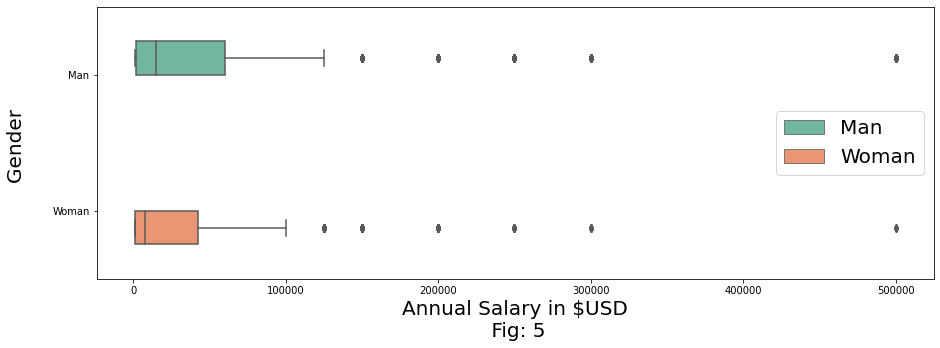

In [ ]:
###  Part 2 ----------------------------------------------------------####
### Part 2.a ####
## Group by data with "Q2" only having Man and Woman and Salary
sal_gender_df = df2.loc[:,['Q2','Q25']]
sal_gender_df = sal_gender_df[sal_gender_df['Q25']<550000]
sal_by_gender = sal_gender_df.groupby('Q2')['Q25'].describe()

print("\n \t\t\t Salary distribution by gender \n")
display(sal_by_gender)
print(" \n \t\t\t\t\t Fig: 4")

### Plot result for better understanding of distribution ###
fig4 = plt.subplots(figsize=(15,5))
sns.boxplot(x='Q25', y='Q2', hue='Q2', data=sal_gender_df, 
                      palette='Set2',showfliers=True, whis = 1.5, width=0.5)

plt.legend(loc = 'best',prop={'size': 20})
plt.xlabel('Annual Salary in $USD\n Fig: 5',fontsize=20);
plt.ylabel('Gender \n',fontsize=20);
plt.show()


Statics above shows the difference in the mean salary distribution between men and women data scientists.

> For the analysis, salary under USD 550 k are removed as outliers according to the presented dataset. This value is very small below 1% of the data so can be eliminated for further analysis. 

> Male have mean salary around USD 45380 with standard variation (std) USD 67127 and female's have mean around USD 32478 and std of USD 54178. 

> Boxplot shows the difference in varitation and spread of data for both the set. This is expected because of the diffrence in salary amongn different countries.

**2.b. [0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold. Explain your rationale.**

To know the whether the salary of both the groups (man and woman) are statistically significant we need to perform the t-test. Since the spread of the data (variance) is different seen in the box plot we will perform unequal variance t-test.

**Null hypothesis (H0)** : avg mean salary (man) - avg mean salary (woman) == 0

**Alternate hypotheis (H1)** : avg mean salary (man) - avg mean salary (woman) != 0

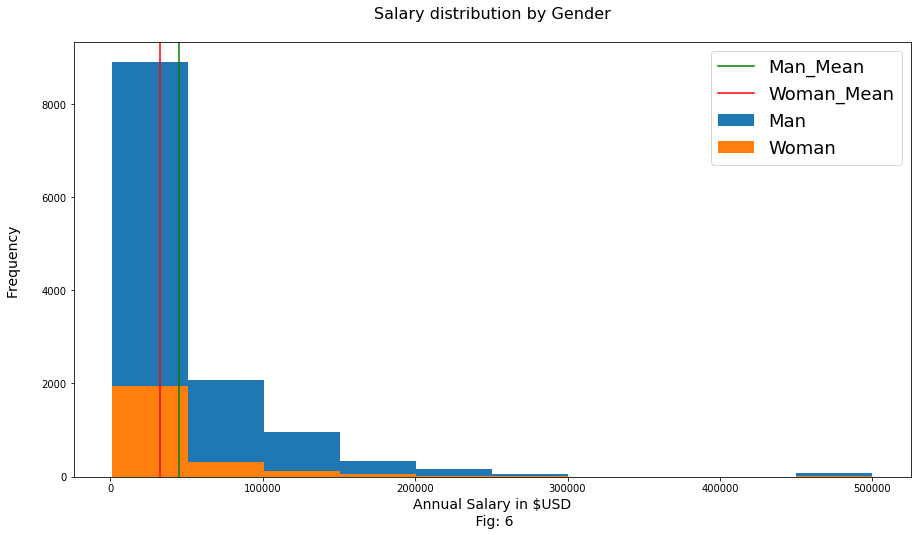

In [ ]:
###Part 2.b-------------------- ######
### Assign mean and std values for further working ####
mean_man = sal_by_gender["mean"]["Man"]
std_man = sal_by_gender["std"]["Man"]
mean_woman = sal_by_gender["mean"]["Woman"]
std_woman = sal_by_gender["std"]["Woman"]

fig4 = plt.subplots(figsize=(15,8))
plt.hist(sal_gender_df.loc[sal_gender_df['Q2']== "Man"]['Q25'], label = "Man")
plt.hist(sal_gender_df.loc[sal_gender_df['Q2']== "Woman"]['Q25'],label = "Woman")

plt.axvline(x=mean_man,color="green", label="Man_Mean")  #Show mean vertical liine for Man
plt.axvline(x=mean_woman,color="red", label="Woman_Mean")  #Show mean vertical liine for woman

plt.legend(fontsize=18)
plt.title('Salary distribution by Gender\n',fontsize=16)
plt.xlabel('Annual Salary in $USD\n Fig: 6',fontsize=14);
plt.ylabel('Frequency \n',fontsize=14);
plt.show()


**Check wheather to perform t-test:**
There are three condition to check if the t-test could be performed
> **Randomization** Yes, the data is selected randomly.

> **Independence** Yes, data is collect from independent survey.

> **Normal Distribution Condition**:No!, from the histogram plotted above for the mean salary of both the groups, salary distribution for men and women plots are Right-Skewed distribution . 
Since the data is not normaly distributed, we cannot perform a two-sample t-test.

**2.c. [1.5pts] Bootstrap your data for comparing the mean of salary (Q25) for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and
the distribution of the difference in means.**

Inorder to normalise the data, bootstrap technique is used with resampling to estimate statistics on a population by sampling a dataset with replacement. Here, the no. of sample used for each  group is proportional to its original size in the dataset. After iterating over a range of sample size from 20% to 90%, sampling size of 100% is presented.

In the following code, data is bootstaped and iterated over 1000 times. Histogram of the bootstaped means of salary along with the difference in the means is presented below. 

Sample size Man = 12565 , Sample size Woman =  2476


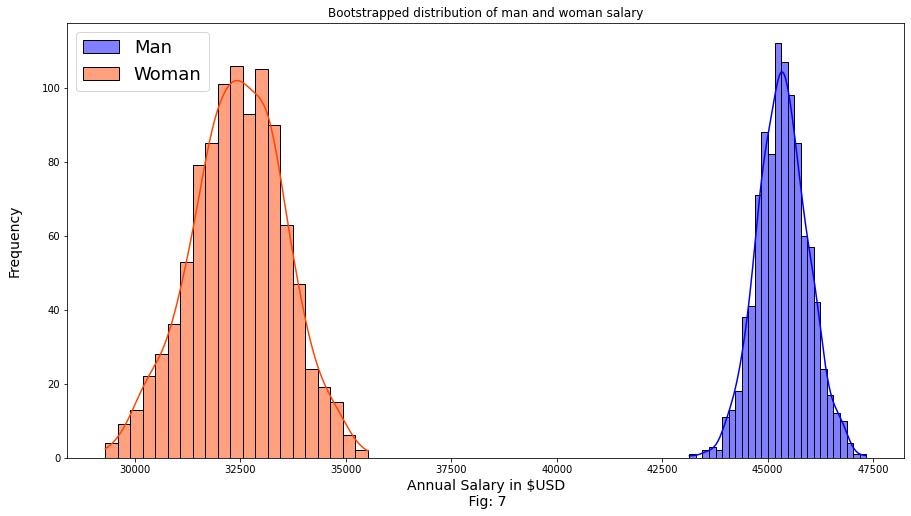

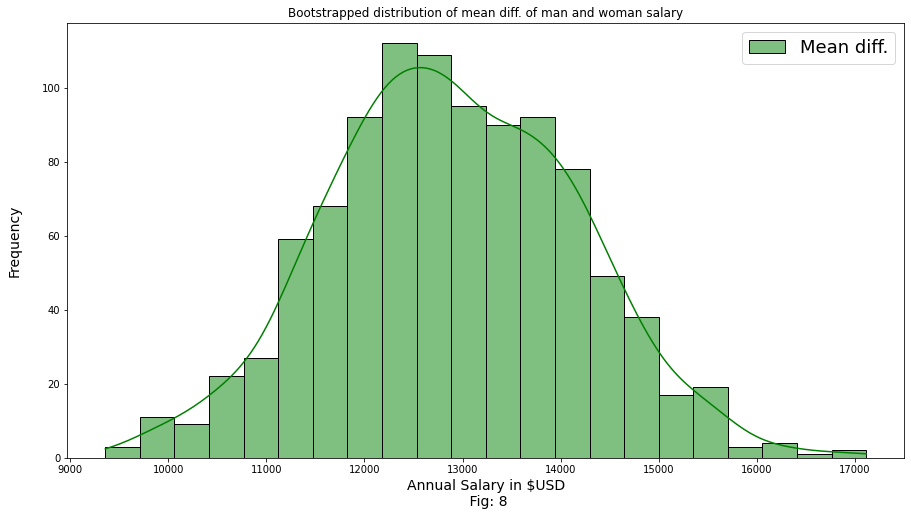

In [ ]:
###Part 2.c-------------------- ######
### Saving separate dataframe for Man and Woman

sal_man_df = sal_gender_df.loc[sal_gender_df['Q2']== "Man"]['Q25']
sal_woman_df = sal_gender_df.loc[sal_gender_df['Q2']== "Woman"]['Q25']


### Define a funtion for bootstraping further data ###
def mybootstrap(mysample):
    ''' Input data sample gives out bootstraped mean and sample size '''
    sample_size = int(len(mysample)*1)  ## 100 % sampling
    boot_mysample = sklearn.utils.resample( mysample , replace=True, n_samples= sample_size)
    boot_mean = boot_mysample.mean()
    return boot_mean, sample_size

### Storing bootstraped mean for Man and Woman
boot_man = np.zeros((0,0))
boot_woman = np.zeros((0,0))

### Bootstrap data for 1000 iterations
for i in range(1000):
  boot_man = np.append(boot_man, mybootstrap(sal_man_df)[0])
#  print("Mean Man", mybootstrap(sal_man_df)[0])
  boot_woman = np.append(boot_woman, mybootstrap(sal_woman_df)[0])
#  print("Mean Woman", mybootstrap(sal_man_df)[0])

print("Sample size Man =",mybootstrap(sal_man_df)[1],", Sample size Woman = ",mybootstrap(sal_woman_df)[1])

## Plot for Mean distribution for both gender
fig5 = plt.subplots(figsize=(15,8))
sns.histplot(boot_man, kde=True, color= 'Blue', label= "Man")
sns.histplot(boot_woman, kde=True,color="orangered",label= "Woman")

plt.xlabel("Annual Salary in $USD\n Fig: 7",fontsize=14)
plt.ylabel("Frequency\n",fontsize=14)
plt.title("Bootstrapped distribution of man and woman salary")
plt.legend(loc="best",fontsize=18)
plt.show()

### Difference in bootstraped means
diff_boot = boot_man-boot_woman

fig6 = plt.subplots(figsize=(15,8))
sns.histplot(diff_boot, kde=True, color= 'g', label= "Mean diff.")

plt.xlabel("Annual Salary in $USD\n Fig: 8",fontsize=14)
plt.ylabel("Frequency\n",fontsize=14)
plt.title("Bootstrapped distribution of mean diff. of man and woman salary")
plt.legend(loc="best",fontsize=18)
plt.show()

**2.d. [0.5pts] If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. Explain your rationale.**

As compared to part 2.c, where the distribution was right skewed, sample after bootstrapping is now normally distributed. So, the t-test  can be successfully performed as all the three conditions are satisfied.

In [ ]:
###Part 2.d-------------------- ######
### Performing two-sample t-test with 0.05 threshold(alpha)

alpha = 0.05
tc, pc = stats.ttest_ind(boot_man, boot_woman, equal_var=False)  #Set Equal Variance to  False
print ("t-test: t = %.3f  p = %.3f" % (tc, pc))

if(pc<=0.05): 
  print("Reject Null Hypothesis that the mean of the salaries are equal") 
else: 
  print("Accept Null Hypothesis that the mean of the salaries are equal")


t-test: t = 324.422  p = 0.000
Reject Null Hypothesis that the mean of the salaries are equal


**2.e. [1pts] Comment on your findings.**

**Answer:**

>Bootstrapped samples of men and women are found to be normally distributed, so performing two-sample t-test on both samples, it can be seen that value of pc(alpha)or p<=0.05 that is our threshold for 95 % confidence interval. 
Based on the result we can **Reject Null Hypothesis that the mean of the salaries are equal**.

>There is no relation between mean of men and women samples.

>It can also be concluded that generally women in data science field receive less average salary compensation than man in the same field. 

##**3 [5 pts] Estimating the difference between average salary for different level of education</font>.**

**3.[5pts] Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this time use analysis of variance (ANOVA) instead of t-test for hypothesis testing to compare the means of salary for three groups (Bachelor’s degree, Doctoral degree, and Master’s degree)
[0.75pts for a; 0.5 pts for b; 2pts for c; 0.75 pts for d; 1pt for e].**

**3.a. [0.75pts] Compute and report descriptive statistics for each group (remove missing data, if necessary).**


For this part of the assignment, focus is on comparing salaries between three groups of candidates according to there education level. In the previous part, t-test was used as it consisted of only two variables. To compare two or more variables, here three, ANOVA would be used for further inference. 

Variables:  **Education-Level: Doctoral degree, Master’s degree, Bachelor’s degree**.

In the code below, descriptive statistics along with the boxplot is shown to better understand data.

Note of this analysis, the data above 550K is removed as outliers, similar to the earlier study, that comprises of less than 1% of the data.

Salary distribution by education



,count,mean,std,min,25%,50%,75%,max
Q4,,,,,,,,
Doctoral degree,2155.0,62872.389791,83396.595042,1000.0,4000.0,30000.0,90000.0,500000.0
Master’s degree,6656.0,48350.210337,66189.242340,1000.0,3000.0,20000.0,70000.0,500000.0
Bachelor’s degree,4693.0,30191.774984,53895.593082,1000.0,1000.0,7500.0,40000.0,500000.0



 Fig : 9


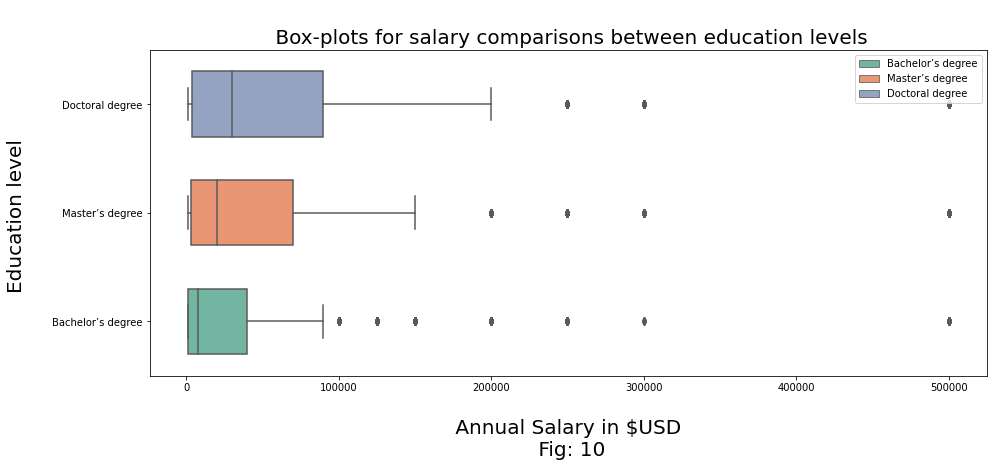

In [ ]:
## Part 3.a-------------#####
## Creating new subset with Salary and education ##
sal_edu_df = df2[(df2['Q4'].isin((degree_order)[0:3])) & (df2['Q25']< 550000)].copy()

## Grouping data and rearranging index by degree
sal_group_edu = sal_edu_df.groupby('Q4')['Q25'].describe()
sal_group_edu = sal_group_edu.reindex(degree_order[0:3])

print("Salary distribution by education\n")
display(sal_group_edu)
print("\n Fig : 9")

### Plot result for better understanding of distribution ###
fig4 = plt.subplots(figsize=(15,6))
sns.boxplot(x='Q25', y='Q4', hue='Q4', order=degree_order[0:3],
            data=sal_edu_df, palette='Set2',showfliers=True, dodge=False, whis = 1.5, width=0.6)

plt.title("\n Box-plots for salary comparisons between education levels", fontsize=20);
plt.legend(loc = 'best',prop={'size': 10})
plt.xlabel('\n Annual Salary in $USD \n Fig: 10',fontsize=20);
plt.ylabel('Education level \n',fontsize=20);
plt.show()

**3.b. [0.5pts] If suitable, perform a ANOVA test with a 0.05 threshold. Explain your rationale.**

The descriptive statistics provides three key points:
1.  Master's degree represents the highest count followed by bachelor's degree. Doctoral degree beign the least of three. 
2. Irrespective of their size in population doctoral degree has the highest mean salary, followed by Masters and then bachelor's degree holders. This makes sense in terms of level of eduction and compensation.
3. Difference in variance between the groups is evident, data is skewed towards the higher salary range for all the groups. 

In order to have a better inference from the ANOVA test, the plots or data needs to be redefined.
There are multiple ways for data transformation like roots or logarithms or reciprocals. Here, square roots is used for transforming the data.

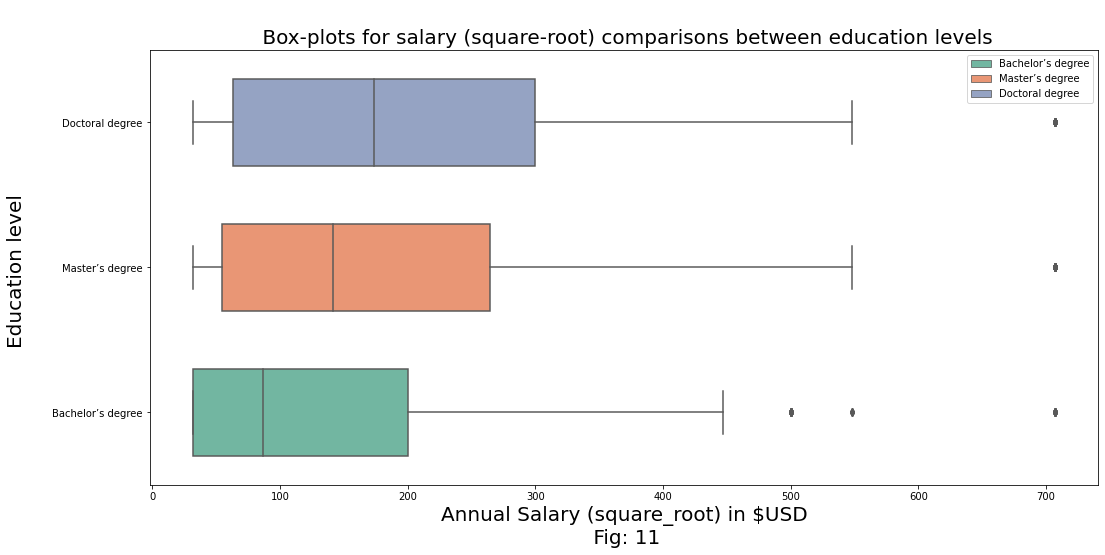

The levene-test gives very low p value (4.865783490324436e-65) which suggests that the variances are not similar between the groups.


In [ ]:
###Part 3.b-------------------- ######
#Salary values are reexpressed and plotting the box-plots.

sal_edu_df_redef = sal_edu_df.copy()                         ### Copy the sal_edu dataframe for re expressing the salary values
sal_edu_df_redef["Q25"] = np.sqrt(sal_edu_df_redef["Q25"])   

### Plot result for better understanding of distribution ###
fig4 = plt.subplots(figsize=(17,8))
sns.boxplot(x='Q25', y='Q4', hue='Q4', order=degree_order[0:3],
            data=sal_edu_df_redef, palette='Set2',showfliers=True, dodge=False, whis = 1.5, width=0.6)

plt.title("\n Box-plots for salary (square-root) comparisons between education levels", fontsize=20);
plt.legend(loc = 'best',prop={'size': 10})
plt.xlabel('Annual Salary (square_root) in $USD\n Fig: 11',fontsize=20);
plt.ylabel('Education level \n',fontsize=20);
plt.show()

stat, p_levene = levene(sal_edu_df_redef[sal_edu_df_redef["Q4"]== degree_order[2]]["Q25"], 
                        sal_edu_df_redef[sal_edu_df_redef["Q4"]== degree_order[1]]["Q25"], 
                        sal_edu_df_redef[sal_edu_df_redef["Q4"]== degree_order[0]]["Q25"])

print("The levene-test gives very low p value ({}) which suggests that the variances are not similar between the groups.".format(p_levene))

The box plot below shows that the spreads are now uniform. But, levene test suggets that unequal variances in the re-structured data.



Welch ANOVA for unequal variances:


,Source,ddof1,ddof2,F,p-unc,np2
0,Q4,2,5425.231244,209.464373,2.355549e-88,0.03




ANOVA Test Table:


,df,sum_sq,mean_sq,F,PR(>F)
C(Q4),2.0,9.585167e+06,4.792584e+06,286.048182,2.142150e-122
Residual,13501.0,2.262020e+08,1.675446e+04,NaN,NaN



				 Fig 12


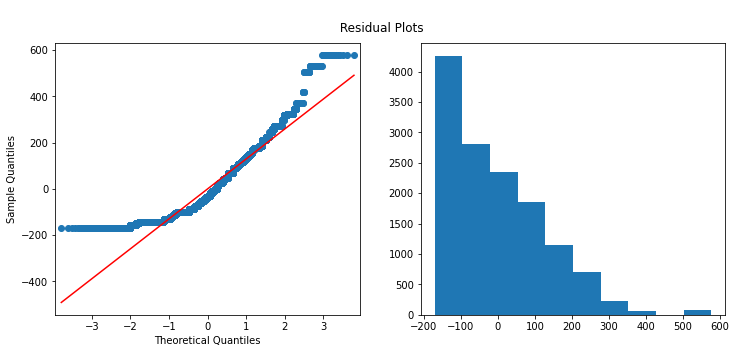

						  Fig 13


In [ ]:
#  Performing Welch ANOVA and standard Anova # 

# Performing Welch ANOVA on original data 
print("\n\nWelch ANOVA for unequal variances:")
welch_anova_result = welch_anova(dv='Q25', between='Q4', data= sal_edu_df)
display(welch_anova_result)

#Perform ANOVA for  re-adjusted data.
sal_edu_model = sfa.ols('Q25 ~ C(Q4)', data=sal_edu_df_redef).fit()
sal_edu_anova = sm.stats.anova_lm(sal_edu_model)


# Display Anova table
print("\n\nANOVA Test Table:")
display(sal_edu_anova)
sal_edu_res = sal_edu_model.resid   ### Residual data
print("\n\t\t\t\t Fig 12")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('\n Residual Plots')
residual_fig = sm.qqplot(sal_edu_res, line='s', ax=ax1)
ax2.hist(sal_edu_res)
plt.show()
print("\t\t\t\t\t\t  Fig 13")

**Check Conditions for ANOVA:**
> **Randomization**: Yes! The data is randomlly selected from its true population.

> **Independence**: The survey was independent.

> **Nearly Normal Condition for Residuals**: This condition is important for validility of the inferences from ANOVA Test. The histograms of the residuals shows that the residuals normal probability plot follows half-sided normal distribution on the positive side.

**Inferences:**
Residual condition for the ANOVA is not completely met. The reported p-value is extremely low. The inference laid out from the performed test suggests that means of salaries between three groups is not same. 
WELCH ANOVA is also performed on the original data, showing similar results. But we cannot confidently conclude the results as the normality condition was not cleared.

This is a cautious inference. In order to have more confidence in the inference the data will be bootstrapped data and the test will be performed on that data.


**3.c. [2pts] Bootstrap your data for comparing the mean of salary (Q25) for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and
the distribution of the difference in means.**

Sample size Doctoral = 2155 , Sample size Master’s =  6656 , Sample size Bachelor’s =  4693


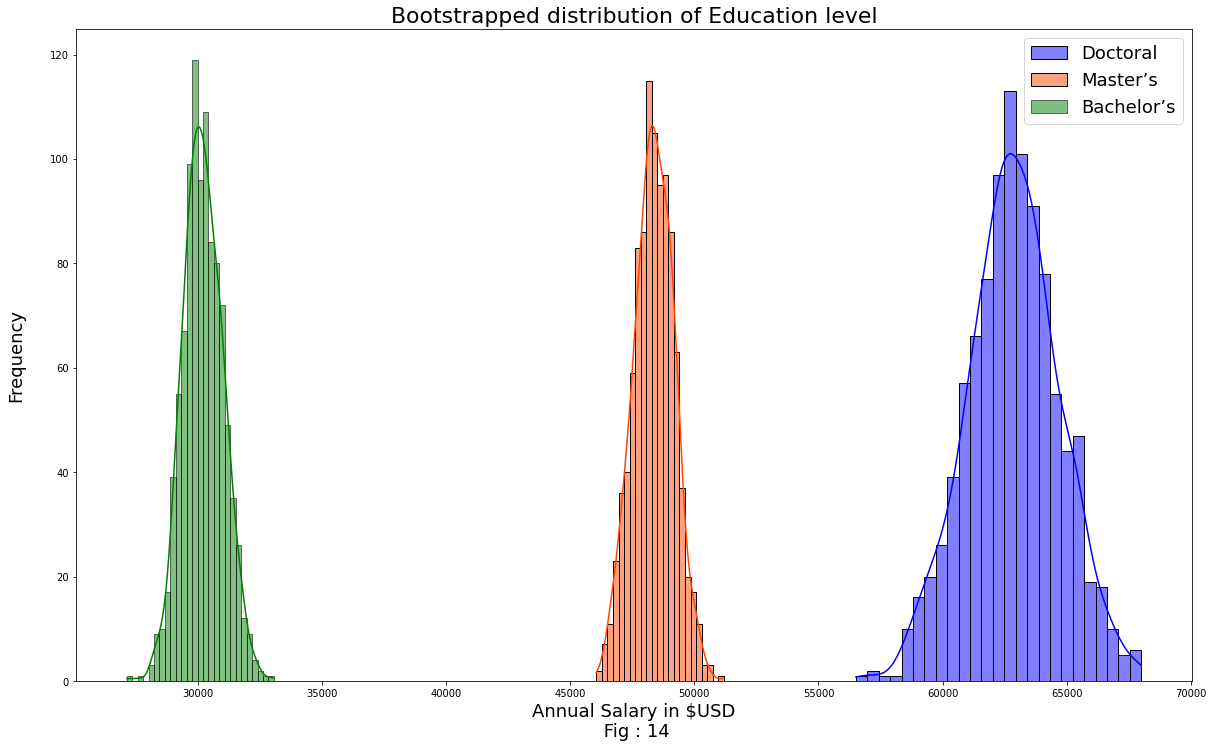

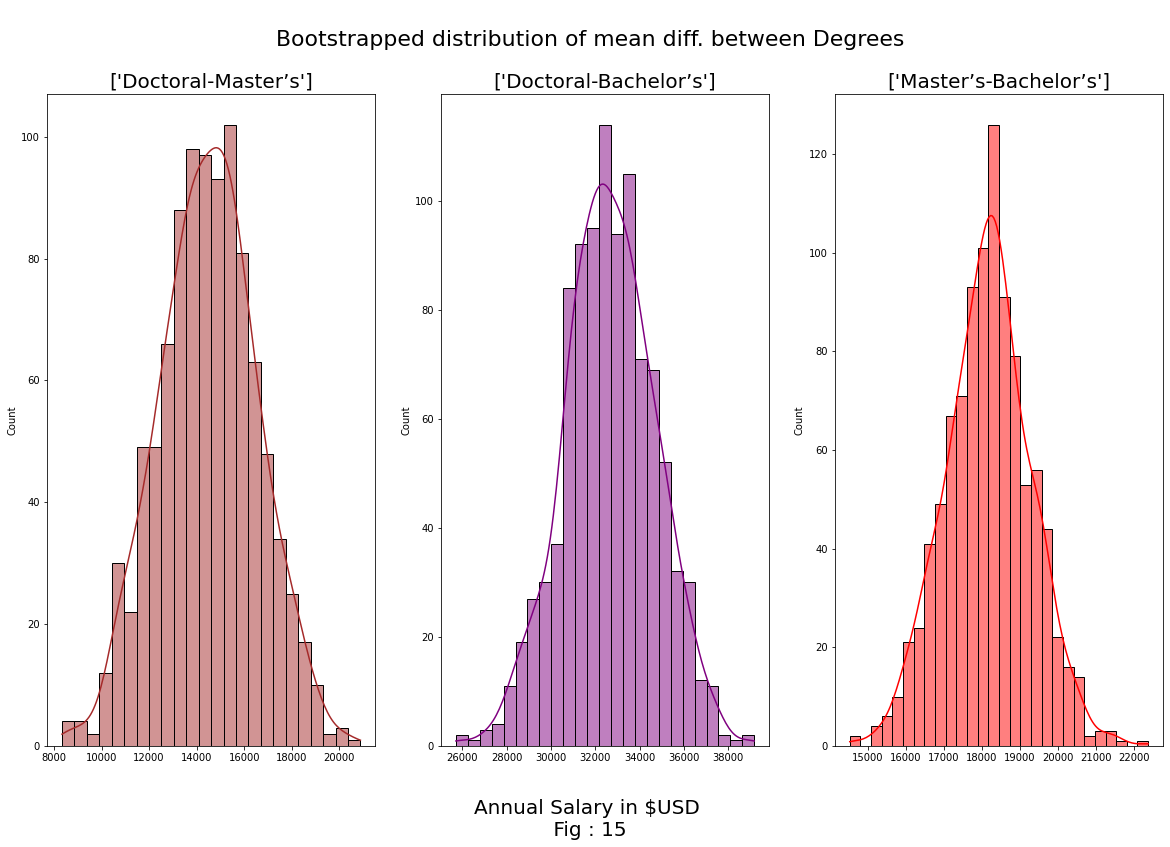

In [ ]:
###Part 3.c-------------------- ######
### Saving separate dataframe for Doctoral , Master’s and Bachelor’s degree

sal_edu_doct = sal_edu_df.loc[sal_edu_df['Q4']== "Doctoral degree"]['Q25']
sal_edu_mstr = sal_edu_df.loc[sal_edu_df['Q4']== "Master’s degree"]['Q25']
sal_edu_bach= sal_edu_df.loc[sal_edu_df['Q4']== "Bachelor’s degree"]['Q25']


### Storing bootstraped mean for Doctoral , Master’s and Bachelor’s degree
boot_doct  = np.zeros((0,0))
boot_mstr = np.zeros((0,0))
boot_bach = np.zeros((0,0))

### Bootstrap data for 1000 iterations
for i in range(1000):
  boot_doct = np.append(boot_doct, mybootstrap(sal_edu_doct)[0])
  boot_mstr = np.append(boot_mstr, mybootstrap(sal_edu_mstr)[0])
  boot_bach = np.append(boot_bach, mybootstrap(sal_edu_bach)[0])


print("Sample size Doctoral =",mybootstrap(sal_edu_doct)[1],
      ", Sample size Master’s = ",mybootstrap(sal_edu_mstr)[1],
      ", Sample size Bachelor’s = ",mybootstrap(sal_edu_bach)[1]
      )

## Plot for Mean salary distribution for all degrees
fig7 = plt.subplots(figsize=(20,12))
sns.histplot(boot_doct, kde=True, color= 'Blue', label= "Doctoral")
sns.histplot(boot_mstr, kde=True,color="orangered",label= "Master’s")
sns.histplot(boot_bach, kde=True,color="green",label= "Bachelor’s")

plt.xlabel("Annual Salary in $USD\n Fig : 14",fontsize=18)
plt.ylabel("Frequency\n",fontsize=18)
plt.title("Bootstrapped distribution of Education level", fontsize= 22)
plt.legend(loc="best",fontsize=18)
plt.show()

### Difference in bootstraped means
diff_doct_mstr = boot_doct-boot_mstr
diff_doct_bach = boot_doct-boot_bach
diff_mstr_bach = boot_mstr-boot_bach


fig,axes = plt.subplots(1,3, figsize=(20, 12))
fig.suptitle("\n Bootstrapped distribution of mean diff. between Degrees", fontsize= 22)

sns.histplot(ax=axes[0],x=diff_doct_mstr, kde=True, color= 'Brown' )
axes[0].set_title(["Doctoral-Master’s"], fontsize= 20)

sns.histplot(ax=axes[1], x=diff_doct_bach, kde=True, color= 'Purple' )
axes[1].set_title(["Doctoral-Bachelor’s"], fontsize= 20)

sns.histplot(ax=axes[2], x=diff_mstr_bach, kde=True, color= 'Red' )
axes[2].set_title(["Master’s-Bachelor’s"], fontsize= 20)

fig.text(0.5, 0.04, 'Annual Salary in $USD\n Fig : 15', ha='center', va='center',fontsize= 20)
plt.show()

In the previous section, the data did not have equal variance and the normality in the residuals from standard Anova test. So the data is bootstarpped with 100% size of the groups with resampling.
After 1000 iterations each group has 1000 samples, the bootstraped data is now normalized. 

Distributions have difference in the variances, but the ANOVA test can still be performed. 

**3.d. [0.75pts] If suitable, perform a ANOVA test with a 0.05 threshold on the bootstrapped data. Explain your rationale.**

The levene-test gives very low p value (2.121529896053287e-148) which suggests that the variances are not similar between the groups.


Welch ANOVA for unequal variances:


,Source,ddof1,ddof2,F,p-unc,np2
0,Q4,2,1869.901702,201443.601443,0.0,0.99127




ANOVA Test Table:


,df,sum_sq,mean_sq,F,PR(>F)
C(Q4),2.0,5.354491e+11,2.677245e+11,170143.943512,0.0
Residual,2997.0,4.715833e+09,1.573518e+06,NaN,NaN



				 Fig: 16


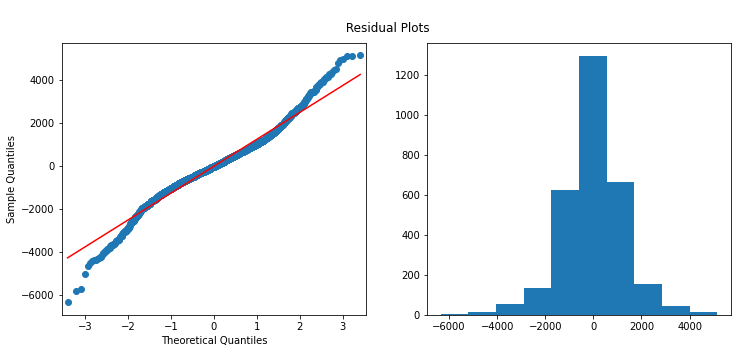

						  Fig 17


In [ ]:
###Part 2.d-------------------- ######
## New data frame with bootstrapped data of different education levels 
boot_doct_df = pd.DataFrame(boot_doct, columns=["Q25"])
boot_doct_df["Q4"] = degree_order[0]

boot_mstr_df = pd.DataFrame(boot_mstr, columns=["Q25"])
boot_mstr_df["Q4"] = degree_order[1]

boot_bach_df = pd.DataFrame(boot_bach, columns=["Q25"])
boot_bach_df["Q4"] = degree_order[2]

boot_dataframe = boot_bach_df.append(boot_mstr_df, ignore_index=True)
boot_dataframe = boot_dataframe.append(boot_doct_df, ignore_index = True)

stat, p_levene = levene(boot_dataframe[boot_dataframe["Q4"]== degree_order[2]]["Q25"], 
                        boot_dataframe[boot_dataframe["Q4"]== degree_order[1]]["Q25"], 
                        boot_dataframe[boot_dataframe["Q4"]== degree_order[0]]["Q25"])

print("The levene-test gives very low p value ({}) which suggests that the variances are not similar between the groups.".format(p_levene))


# Performing Welch ANOVA on bootstrapped data 
print("\n\nWelch ANOVA for unequal variances:")
welch_anova_result_2 = welch_anova(dv='Q25', between='Q4', data= boot_dataframe)
display(welch_anova_result_2)

#Perform ANOVA for  re-adjusted data.
sal_edu_model_2 = sfa.ols('Q25 ~ C(Q4)', data=boot_dataframe).fit()
sal_edu_anova_2 = sm.stats.anova_lm(sal_edu_model_2)


# Display Anova table
print("\n\nANOVA Test Table:")
display(sal_edu_anova_2)
sal_edu_res_2 = sal_edu_model_2.resid   ### Residual data
print("\n\t\t\t\t Fig: 16")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('\n Residual Plots')
residual_fig = sm.qqplot(sal_edu_res_2, line='s', ax=ax1)
ax2.hist(sal_edu_res_2
         )
plt.show()
print("\t\t\t\t\t\t  Fig 17")

After bootstapping the data and performing the levene test gives very low p value that suggests the variances are not similar between the groups. But, the Standard ANOVA is performed as it was done in the previous section.

Welch ANOVA is also performed to confirm the results.
It is observed that the residual plots are normally distributed, that justify all the three conditions of Randomization, Independence and normal distribution of residuals.

So it can be infered that, the extremely low p-values in both the ANOVA test shows that the three groups have different means annual salary.



**3.e. [1pts]Comments on the ANOVA Hypothesis Testing</font>**

> Results from both the ANOVA tests- WELCH and standard test, reports an extremely low p-values. So, it can deduced that there is a difference between mean salary of the three groups of participents with different level of education

> Overall, it can be said that on an average a Data-scientists with a doctoral degree often receive a higher annual salary than the Master's and Bachelor's degree holders. 
